<a href="https://colab.research.google.com/github/omar-ahmd/Statistics-Project-/blob/main/MDI220_MiniProjet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___
# **<center>Mini-Projet Satistiques</center>**
___
> MDI-220
### *Préparé par:*  
> Omar AHMAD



In [148]:
import pandas as pd
import datetime
from scipy import stats
from scipy.stats import gamma,normaltest
import matplotlib.pyplot as plt
import numpy as np
import pylab 

___
## **Ex1: Exploration des données**
___

### Importing Data 
On va tout d'abord telecharger les donnés du $\color{red}{\text{Nuclear Power Accidents}}$ et ensuite on explorera ces donnés.

In [ ]:
!wget --no-check-certificate https://innovwiki.ethz.ch/v1/images/NuclearPowerAccidents2016.csv

--2021-10-30 09:06:00--  https://innovwiki.ethz.ch/v1/images/NuclearPowerAccidents2016.csv
Resolving innovwiki.ethz.ch (innovwiki.ethz.ch)... 82.130.119.13
Connecting to innovwiki.ethz.ch (innovwiki.ethz.ch)|82.130.119.13|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://xyotta.com/v1/images/NuclearPowerAccidents2016.csv [following]
--2021-10-30 09:06:00--  https://xyotta.com/v1/images/NuclearPowerAccidents2016.csv
Resolving xyotta.com (xyotta.com)... 82.130.119.13
Connecting to xyotta.com (xyotta.com)|82.130.119.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41814 (41K) [text/csv]
Saving to: ‘NuclearPowerAccidents2016.csv’

NuclearPowerAcciden 100%[===================>]  40.83K  --.-KB/s    in 0s      

2021-10-30 09:06:01 (303 MB/s) - ‘NuclearPowerAccidents2016.csv’ saved [41814/41814]



In [ ]:
!ls

NuclearPowerAccidents2016.csv  sample_data


#### Load data

In [ ]:
data = pd.read_csv('NuclearPowerAccidents2016.csv')

In [ ]:
data.head()

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,4/26/1986,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056
1,3/11/2011,"Fukushima Prefecture, Japan",166089.0,7.0,7.5,A,An earthquake and tsunami caused emergency bac...,573
2,12/8/1995,"Tsuruga, Japan",15500.0,NaN,NaN,A,Japan's only fast breeder reactor Monju suffer...,0
3,3/28/1979,"Middletown, Pennsylvania, United States",10910.0,5.0,7.9,NaN,Equipment failure and operator error contribut...,0
4,9/11/1957,"Rocky Flats, USA",8189.0,5.0,5.2,NaN,Fire starts and destroys plutonium processing ...,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     216 non-null    object 
 1   Location                 216 non-null    object 
 2   Cost (millions 2013US$)  175 non-null    float64
 3   INES                     104 non-null    float64
 4   Smyth Magnitude          33 non-null     float64
 5   Region                   126 non-null    object 
 6   Description              216 non-null    object 
 7   Fatalities               216 non-null    int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 13.6+ KB


### **1) Extract the observation vector**


In [ ]:
#Change type of Date from string to datetime
data['Date'] = pd.to_datetime(data['Date'])

#Date of accident 
DOA = data.loc[data['Description'].str.contains("Three Mile Island")].Date.values[0]

#My observation Data
X = data.loc[data['Date'] < DOA]

#Supprimer les valeurs null dans le column des couts
X = X[X['Cost (millions 2013US$)'].notna()]


In [ ]:
nb_Obs = len(X)
print("Nombre des observations est: ", nb_Obs)

Nombre des observations est:  55


### **2-a) Fonction quantile d’une loi normale N(µ, σ2)**


On calcule tout d'abord la fonction de repartition de la fonction Normale:
\
\begin{equation}
F(x) =  \int^{+\infty}_{-\infty} \frac{1}{\sigma\sqrt{2\pi}} 
e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^2 } \, dx = \frac{1}{2}[1+erf(\frac{x-\mu}{\sigma\sqrt{2}})] 
\end{equation}
\
\
Maintenant on calcule l'inverse de la fonction de repartition pour obtenir la fonction quantile:

\begin{equation}
F(x) = p \Rightarrow 2p-1 = erf(\frac{x-\mu}{\sigma\sqrt{2}}) \Rightarrow  erf^{-1}(2p-1) = \frac{x-\mu}{\sigma\sqrt{2}} \quad \forall \quad |2p-1| < 1 \Rightarrow p \in ]0,1[
\end{equation}
\
\begin{equation}
F^{-1}(p,\mu,\sigma^{2}) = \mu +\sqrt{2\sigma^{2}} \times erf^{-1}(2p-1)
\end{equation}
\
Et on a: 
\begin{equation}
F^{-1}(p,0,1) = \sqrt{2} \times erf^{-1}(2p-1)
\end{equation}
\
Donc:
\begin{equation}
\boxed{
F^{-1}(p,\mu,\sigma^{2}) = \mu +\sqrt{\sigma^{2}} \times F^{-1}(p,0,1)
} \quad \forall p \in ]0,1[
\end{equation}

### **2-b)Le QQ-plot de données pour la loi normale**

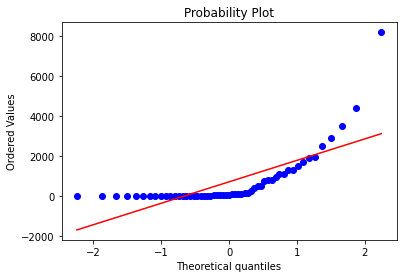

In [ ]:
measurements = X["Cost (millions 2013US$)"]
stats.probplot(measurements, dist=stats.distributions.norm, plot=pylab)
pylab.show()

### **3-a) Fonction quantile d’une loi normale $Exp(\lambda)$**


On calcule tout d'abord la fonction de repartition de la fonction Exponential:
\
\begin{equation}
F(x) =  \int^{+\infty}_{-\infty} \lambda e^{-\lambda x} \, dx = 1-e^{-\lambda x} \quad ,  \quad 0 \le F(x) \le 1 
\end{equation}
\
\
Maintenant on calcule l'inverse de la fonction de repartition pour obtenir la fonction quantile:

\begin{equation}
F(x) = p \Rightarrow 1-p = e^{-\lambda x} \Rightarrow  ln(1-p) = -\lambda x \quad \forall p \in [0,1]
\end{equation}
\
\begin{equation}
F^{-1}(p,\lambda) = \frac{-1}{\lambda} \times ln(1-p)
\end{equation}
\
Et on a: 
\begin{equation}
F^{-1}(p,1) = -ln(1-p)
\end{equation}
\
Donc:
\begin{equation}
\boxed{
F^{-1}(p,\lambda) = \frac{-1}{\lambda} \times F^{-1}(p,1)
} \quad \forall p \in [0,1]
\end{equation}

### **3-b)Le QQ-plot de données pour la loi exponentiel**


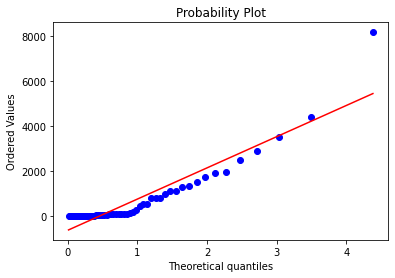

In [ ]:
stats.probplot(measurements, dist=stats.distributions.expon(), plot=plt)
plt.show()

### **4)Le QQ-plot de données pour la loi exponentiel**



En utilisant les QQ-plot qui indique par definition la similarité entre 2 distributions. Dans notre cas le but est de savoir lequelle des 2 distributions(normal, exponentielle) est plus plausible pour les donnés. 
D'après les 2 graphe QQ-plot tracer avant, on remarque que la relation entre le quantile des donnés observés et celle de la loi normal n'est pas lineaire et il est presque exponentielle. 
Alors que l'autre graphe nous illustre une relation presque lineaire entre le quantile des donnés observés et le quantile de la loi exonentielle.

**Donc on peut utiliser la loi exponentielle pour modéliser les coûts des accidents avant l’accident de Three Mile Island**

___
## **Ex2: Estimation ponctuelle des paramètres d’une loi exponentielle**
___

La densité de probabilté de la loi exponentielle est:

\begin{equation}
p(x;\lambda) = \lambda e^{-\lambda x} \quad \forall \quad x \in [0;+\infty[ \quad , \lambda \gt 0
\end{equation}


### **1) L’estimateur du maximum de vraisemblance $\widehat{\lambda}_n$ du paramétre $\lambda$** 




Pour appliquer le maximum de vraisemblance on doit calculer $M(X,\lambda)$:
\
\
Tout d'abord comme les variables aleatoires sont $i.i.d$ donc: 
\begin{equation}
p(X;\lambda) = \prod_{i=1}^n p(x_i,\lambda) = \lambda^n e^{-\lambda \sum_{i=1}^n x_i}
\end{equation}
\
On peut calculer maintenant $M(X,\lambda)$:
\begin{equation}
M(X;\lambda) = -log(p(X,\lambda)) = -n Log(\lambda) +  \lambda \sum_{i=1}^n x_i
\end{equation}

On derive $M(X;\lambda)$ par rapport à $\lambda$:

\begin{equation}
\frac{\partial M(X;\lambda)}{\partial \lambda} = \frac{-n}{\lambda} + \sum_{i=1}^n x_i = 0 \quad \Rightarrow \boxed{\widehat{\lambda}_n = \frac{n}{\sum_{i=1}^n x_i}  }
\end{equation}

In [ ]:
estimated_lambda = len(X) * (1/sum(X["Cost (millions 2013US$)"]))
estimated_lambda

0.0013767725947156967

**Donc:**$\quad \boxed{\widehat{\lambda}_n \approx 0.001377 }$



### **2) Comparison de la loi exponentielle éstimée et les valeurs observés**

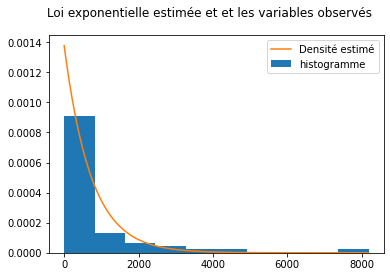

In [ ]:
x = X["Cost (millions 2013US$)"]
x_est = np.arange(0,max(x), 0.1)
y_est = estimated_lambda*np.exp(-estimated_lambda*x_est)

fig, ax=plt.subplots()
#histogramme associé:
ax.hist(x,bins=10, density=True, label="histogramme")
fig.suptitle("Loi exponentielle estimée et et les variables observés ")
#densité de la loi associée:
ax.plot(x_est,y_est, label="Densité estimé")
a = ax.legend()




### **3) Estimation de la grandeur d’intérêt: $g_1(λ) = \frac{1}{λ}$, et etudier l'efficacité de $T_1(X)$**

On a par hypothèse les observations **$X_i \stackrel{i.i.d.}{\sim} \varepsilon\ (\lambda)$**

\\

Pour qu'un estimateur soit efficace il faut que:

1. Le biais soit nul:
$\quad \mathbb{E}[T_1(X)-g(\lambda)] = \mathbb{E}[\frac{1}{n} \sum_{i=1}^n x_i-\frac{1}{\lambda}] =\frac{1}{n} \times \frac{n}{\lambda} - \frac{1}{\lambda} = 0$ , condition verifié
2. Le variance soit égale à la borne cramer-rao:

  a. $Var_\lambda(T_1(X)) = Var_\lambda(\frac{1}{n} \sum_{i=1}^n x_i) = \frac{1}{n^2} \sum_{i=1}^nVar_\lambda(x_i) = \frac{n}{n^2 \lambda^2} = \frac{1}{n \lambda^2}$

  b. $BCR = \frac {g'(\lambda)^2}{I(\lambda)}$
    -  $g'(\lambda)  = \frac{-1}{\lambda^2}$
    -  $I_1(\lambda) = Var_\lambda(\frac{\partial log(p(x_1;\lambda))}{\partial \lambda})$ ; car pour un modéle regulier $\mathbb{E}[\frac{\partial log(p(x;\lambda))}{\partial \lambda}] = 0$

    $I_1(\lambda) = Var_\lambda(\frac{\partial }{\partial \lambda}(log(\lambda) -\lambda x))= \frac{1}{\lambda^2} \quad ; \quad I(\lambda)=nI_1(\lambda)$( car $X_i \stackrel{i.i.d.}{\sim} \varepsilon\ (\lambda)$) et $I(\lambda)$ represente l'information de fisher

  donc: $BCR = \frac {g'(\lambda)^2}{I(\lambda)} = \frac{1/\lambda^4}{n/\lambda^2} = \frac{1}{n \lambda^2} \quad \Rightarrow \quad \boxed{BCR = Var_\lambda(T_1(X)) = \frac{1}{n \lambda^2}}$



**Alors $T_1(X)$ est un estimateur soit efficace de $g_1(λ)$**
    
    

### **4) Calculer $g_1$ en utilisant $T_1$ pour l’échantillon donné.**


\begin{equation}
g_1(\widehat\lambda) = \frac{1}{n}\sum_{i=1}^n x_i
\end{equation}

In [ ]:
g1_lambda  = 1/estimated_lambda
g1_lambda

726.3363636363636

\begin{equation}
\boxed{g_1(\tilde{\lambda}) = 726.336 \quad millions$}
\end{equation}


### **5) Etudier un nouveau estimateur: $\widetilde{T}_{1,\eta}(X) = \eta T_1(X);\quad \eta \gt 0$.**




- $EQM(\lambda,T_1)  = \frac{1}{n\lambda^2}$
- $EQM(\lambda,\widetilde{T}_{1,\eta}) = b(\lambda,\widetilde{T}_{1,\eta})^2  + Var_\lambda(\widetilde{T}_{1,\eta}) = (\frac{1}{\lambda}(\eta -1))^2  + \frac{\eta^2}{n\lambda^2}$

Soit une fonction: $F(\eta) = EQM(\lambda,\widetilde{T}_{1,\eta}) - EQM(\lambda,T_1) = \frac{1}{\lambda^2}(\eta -1)^2 + \frac{1}{n\lambda^2}(\eta^2 -1), 
\quad  \eta > 0 \quad et \quad n >0$

- $F'(\eta) = 0 \Rightarrow \eta = \frac{n}{n+1}$ et $F(\frac{n}{n+1}) < 0$
- $F''(\eta) = \frac{2n}{n+1} > 0$

Donc $F(\eta)$ est convexe et possède 2 racines: $\eta \in 	\{\frac{n-1}{n+1},1	\}$

\begin{equation}
\boxed{EQM(\lambda,\widetilde{T}_{1,\eta}) < EQM(\lambda,T_1) \quad \forall \quad \eta \in \quad 	]\frac{27}{28},1	[ \quad }
\end{equation}

### **6) L’estimateur sans biais de la médiane.**


On sait que le mediane du loi exponentiel est : $Med(X)= \frac{ln(2)}{\lambda}$

\begin{equation}
\mathbb{E}[\widetilde{T}_{1,\eta} - \frac{ln(2)}{\lambda}] = 0 \quad \Rightarrow \quad \frac{\eta}{\lambda} - \frac{ln(2)}{\lambda} = 0 \quad \Rightarrow \quad \boxed{\eta = ln(2)}\quad
\end{equation}

**<center>Donc pour $\eta = ln(2)$ l'estimateur de la médiane est sans biais</center>**

In [ ]:
med_Est = np.log(2)/estimated_lambda
print("L'estimation de la mediane est: ",med_Est)
iSort_X = np.argsort(X["Cost (millions 2013US$)"].values)
med_Emp = X["Cost (millions 2013US$)"].values[iSort_X[int(len(iSort_X)/2)]]
print("La mediane empirique est: ",med_Emp)

L'estimation de la mediane est:  503.45800259270857
La mediane empirique est:  89.9


La moyenne emirique 89.9 est plus petite que celle estimée 503.45, et ceci est due au petit nombre d'observations(n=55).  
Donc, ces deux médianes seront plus proches plus que n augmente.


### **7) Comparaison des risques quadratiques des estimateurs $T_1$ et $\widetilde{T}_{1,\eta}$ comme estimateurs pour $g_1(λ)$.**





- $EQM(\lambda,T_1)  = \frac{1}{n\lambda^2}$

In [ ]:
print("le risque quadratique sous T1 est",f"{1/(nb_Obs*estimated_lambda**2)}")

le risque quadratique sous T1 est 9592.082057099922


- $EQM(\lambda,\widetilde{T}_{1,ln(2)}) = (\frac{1}{\lambda}(ln(2) -1))^2  + \frac{(ln(2))^2}{n\lambda^2}$


In [ ]:
eta = np.math.log(2)
print("le risque quadratique sous T1 est",f"{(g1_lambda*(eta-1))**2 + (g1_lambda*eta)**2 / nb_Obs}")

le risque quadratique sous T1 est 54283.308555590185



Soit une fonction: $K(n) = EQM(\lambda,\widetilde{T}_{1,ln(2)}) - EQM(\lambda,T_1) = \frac{1}{\lambda^2}(ln(2) -1)^2 + \frac{1}{n\lambda^2}(ln(2)^2 -1), \quad n >0$

$K(n) > 0 \quad \forall \quad n > \frac{1-ln(2)^2}{(ln(2)-1)^2} \quad \Rightarrow \boxed{EQM(\lambda,\widetilde{T}_{1,ln(2)}) > EQM(\lambda,T_1) \quad \forall \quad n \ge 6}$



**On visualize ces 2 fonctions**

A partir de n= 6 le risque quadratique T1(n,eta=ln(2)) est plus grand que T1


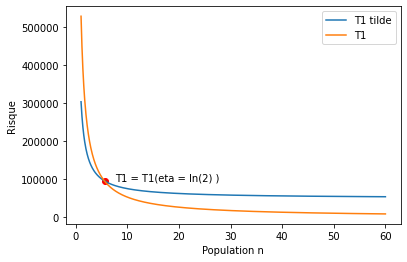

In [ ]:
eta = np.math.log(2)
nVect = np.linspace(1,60,1000)

risqueT1 = 1/(nVect*estimated_lambda**2) #T1(n)
risqueT1tilde = ((nVect+1)*eta**2 -2*nVect*eta +nVect)/(nVect*estimated_lambda**2) #T1(n,eta=ln(2))

for n in range(len(nVect)):
  if (risqueT1[n] - risqueT1tilde[n]<=0):
    a=nVect[n]
    i = int(np.ceil(a))
    print("A partir de n=",i,end='')
    print(" le risque quadratique T1(n,eta=ln(2)) est plus grand que T1")
    break

fig, ax = plt.subplots(1, 1)
ax.set_ylabel('Risque')
ax.set_xlabel('Population n')

ax.plot(nVect,risqueT1tilde, label = "T1 tilde")
ax.plot(nVect,risqueT1,label = "T1")
ax.scatter(a, 1/(a*estimated_lambda**2),color='red',alpha = 1)
a=plt.text(a+2 , 1/(a*estimated_lambda**2) ,'T1 = T1(eta = ln(2) )')
a = ax.legend()

Pour savoir le valeur de $\eta$  qui mimizie le risque quadratique pour un nombre d'obseravtions 55:
 

Donc le risque quadratique pour n=55 est minimum pour eta = 0.9808


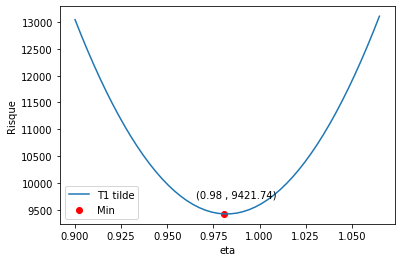

In [ ]:
etaVect = np.linspace(0.9, 1.065,50)
risqueT1 = ((nb_Obs+1)*etaVect**2 -2*nb_Obs*etaVect +nb_Obs)/(nb_Obs*estimated_lambda**2) #T1(n,eta=ln(2))

rmin = np.min(risqueT1)
rargmin = np.argmin(risqueT1)

fig, ax = plt.subplots(1, 1)
ax.set_ylabel('Risque')
ax.set_xlabel('eta')

ax.plot(etaVect,risqueT1, label = "T1 tilde")
ax.scatter(etaVect[rargmin],rmin, label = "Min",color='red')
Min = "({:.2f} , {:.2f})".format(etaVect[rargmin], rmin)
ax.text(etaVect[rargmin]-0.015,rmin+300, Min )
a=ax.legend()


print("Donc le risque quadratique pour n={} est minimum pour eta = {:.4f}".format(nb_Obs,etaVect[rargmin]))

___
## **Ex3: Test sur le paramètre d’une loi**
___
On souhaite affirmer avec un faible risque d’erreur que le coût moyen d’un accident est inférieur à un milliard de dollars.

### **1) Formuler l’hypothèse null et l’hypothèse alternative.**



Le but de cette hypothèse est d'affirmer que le coût moyen est plus petit que un milliard de dollars, donc on parle ici d'un test d’hypothèse multiple unilatérale.

\begin{cases}
H_0: g(\lambda) \le 1000 \quad \Rightarrow \lambda \ge 10^{-3} \\
\\
H_1: g(\lambda) \gt 1000 \quad \Rightarrow \lambda \lt 10^{-3}
\end{cases}

### **2) En utilisant le principe de Neyman-Pearson donner le test le plus puissant pour le niveau α.**
 




On a la densitée de probabilité est:
\begin{equation}
P(x;\lambda) =   \lambda e^{-\lambda x} \quad ; \quad \forall \quad \lambda > 0  
\end{equation}
On calucle le rapport de vraissemblence:  
\begin{equation}
RV =   \frac{L(\lambda;x_1,x_2, ... , x_n)}{L(\lambda';x_1,x_2, ... , x_n)} =\frac{\prod_{i=1}^n P(x_i;\lambda)}{\prod_{i=1}^n P(x_i;\lambda')} =\frac{\lambda^n exp(-\lambda \sum_{i=1}^n x_i)}{\lambda'^n exp(-\lambda' \sum_{i=1}^n x_i)}
\end{equation}
\
\begin{equation}
\boxed{
RV =(\frac{\lambda}{\lambda'})^n . exp(n(\lambda'-\lambda)T_1(X));\quad T_1(X) = \frac{1}{n}\sum_{i=1}^n x_i}
\end{equation}
\
\begin{cases}
\lambda \lt \lambda', \quad RV \quad est \quad croissant.  \\
\\
H_0: \quad \lambda \ge 10^{-3}
\end{cases}
\
Donc, le test uniformément plus puissant $U.P.P$ est donné par l'inégalité : $\quad T_1(x_1,x_2, ... ,x_n) \gt k \quad \Rightarrow \quad \frac{1}{n}\sum_{i=1}^n x_i \gt k$ 

\\
Et on peut calculer K par connaissance du risque de première espèce $\alpha$:
\begin{equation}
\boxed{
\alpha =\sup\limits_{\lambda \in \Lambda_0}(\alpha(\lambda)) = P(T_1(X) \gt K \quad | \quad \lambda = 10^{-3})}
\end{equation}



### **3-4) Appliquer le test pour l’échantillon considéré au niveau α = 0.05 et donner la p-valeur. Et tracer la densité de probabilité de T1 et indiquer la région du rejet au niveau α = 0.05.**


On a les fonction carecteristiques du loi exponentiel et du loi Gamma:
Soit:
\begin{cases}
X \sim Exp(\lambda) \quad \Rightarrow  \Phi_X(t) = \frac{1}{1-\frac{it}{\lambda}}\\
Z \sim \Gamma(\alpha,\theta) \quad \Rightarrow  \Phi_Z(t) = \frac{1}{(1-it\theta)^k}\\
\end{cases}

On sait que les v.a du loi Exp sont i.i.d donc:

\begin{equation}
\Phi_{\sum\limits_{j=1}^nX_j}(t) = \prod\Phi_{X_j}(t) = \frac{1}{(1-\frac{it}{\lambda})^n}\\
\end{equation}

Cela indique que: $Y = \sum_{i=1}^n x_i \sim Gamma(n,\theta = 1/\lambda)$ et $\boxed{T_1(X) = \frac{1}{n}\sum_{i=1}^n x_i \sim Gamma(n,\theta = 1/n\lambda)}$

Et:
\begin{equation}
\alpha = 0.05 = P(T_1(X) \gt K \quad | \quad (n;\theta) = (55;10^{3}/55)\Rightarrow 0.95 = P(T_1(X) \lt K \quad | \quad (n;\theta) = (55;10^{3}/55))
\end{equation}



Alors $\boxed{K = q_{0.95}}$ avec $q_{\alpha}$ est le quantile de la loi de distribution de $Y$

#### Calcule du K

In [ ]:
theta = 1000/nb_Obs #parametre de la loi gamma
k = gamma.ppf(0.95, a=nb_Obs, scale=theta)
print('K=',k)

print("La valeur du statistique observé T(X) est:", g1_lambda)

if g1_lambda <= k:
  print("\non accepte H0 car",g1_lambda,"<",k) 
else:
  print("on rejette H0")

K= 1231.6379811669049
La valeur du statistique observé T(X) est: 726.3363636363636

on accepte H0 car 726.3363636363636 < 1231.6379811669049


On a:
\begin{equation} 
\boxed{
K = 1231.64\quad et \quad T_{obs}(X) = 726.336} 
\end{equation} 
Region Accepté: $A = ]-\infty;1261.64]$ 

Et $\quad T(X) \in A \quad;\quad$ Donc on peut dire que le coût moyen d’accident est inférieur à un milliard de dollars.


#### La densité du $T_1(X)$ et l'indication de la region du rejet.

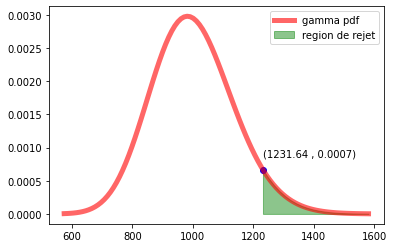

In [146]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(gamma.ppf(0.0001, a=nb_Obs, scale=theta), gamma.ppf(0.9999, a=nb_Obs, scale=theta), 100)
ax.plot(x, gamma.pdf(x, a=nb_Obs, scale=theta), 'r-', lw=5, alpha=0.6, label='gamma pdf')
shade = np.linspace(gamma.ppf(0.95, a=55, loc=0, scale=theta), gamma.ppf(0.9999, a=55, loc=0, scale=theta), 20)
ax.fill_between(shade, gamma.pdf(shade, a=55, loc=0, scale=theta), alpha=0.45, color='green',label='region de rejet')
ax.scatter(gamma.ppf(0.95, a=55, loc=0, scale=theta), gamma.pdf(gamma.ppf(0.95, a=55, loc=0, scale=theta), a=55, loc=0, scale=theta) ,color='blue',alpha = 1)
p = "({:.2f} , {:.4f})".format(gamma.ppf(0.95, a=55, loc=0, scale=theta),gamma.pdf(gamma.ppf(0.95, a=55, loc=0, scale=theta), a=55, loc=0, scale=theta))
a=plt.text(gamma.ppf(0.95, a=55, loc=0, scale=theta), gamma.pdf(gamma.ppf(0.95, a=55, loc=0, scale=theta), a=55, loc=0, scale=theta) +0.0002 ,p)
ax.legend()

#### Calcule du p-value:



\begin{equation}
p_{value} = P(T_1(X) \gt T_{obs}(x) \quad | \quad \lambda = 10^{-3})
\end{equation} 
\begin{equation}
p_{value} = P(T_1(X) \gt 726.336 \quad | \quad (n;\theta) = (55;10^{3}/55))
\end{equation} 


In [ ]:
p_value = 1-gamma.cdf(g1_lambda, a = nb_Obs, scale = theta)
p_value

0.9862825135767351

\begin{equation} 
\boxed{
p_{value} = 0.986 } 
\end{equation}

#### Graphe Indiquant la region du p-value

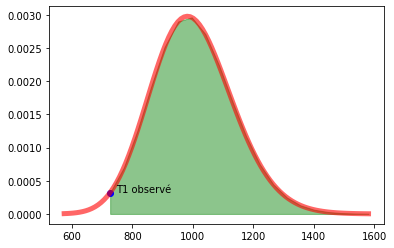

In [195]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(gamma.ppf(0.0001, a=nb_Obs, scale=theta), gamma.ppf(0.9999, a=nb_Obs, scale=theta), 100)
ax.plot(x, gamma.pdf(x, a=nb_Obs, scale=theta), 'r-', lw=5, alpha=0.6, label='gamma pdf')

shade = np.linspace(gamma.ppf(1-p_value, a=55, loc=0, scale=theta), gamma.ppf(0.9999, a=55, loc=0, scale=theta), 20)
ax.fill_between(shade, gamma.pdf(shade, a=55, loc=0, scale=theta), alpha=0.45, color='green')
ax.scatter(gamma.ppf(1-p_value, a=55, loc=0, scale=theta), gamma.pdf(gamma.ppf(1-p_value, a=55, loc=0, scale=theta), a=55, loc=0, scale=theta) ,color='blue',alpha = 1)
a=plt.text(gamma.ppf(1-p_value, a=55, loc=0, scale=theta) + 20 , gamma.pdf(gamma.ppf(1-p_value, a=55, loc=0, scale=theta), a=55, loc=0, scale=theta) ,'T1 observé')

### **5)La fonction puissance de test pour le niveau α en fonction.**

La fonction de puissance est par definition:

\begin{equation}
h(\lambda) = 1 - \beta(\lambda) = 1 - P(T \in A\quad |\quad H_1) 
\end{equation}

Donc:


$h(\lambda) = 1 - P(T_1(x) < K \quad | \quad T_1(x) \sim Gamma(n;\frac{1}{n\lambda_1}));\quad$ avec $\lambda_1 < 10^{-3} \Rightarrow \theta_1 > \frac{1000}n{}$ 




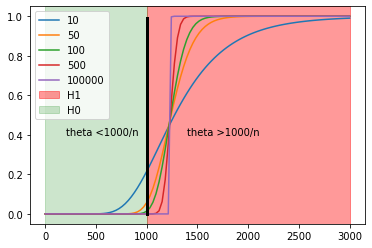

In [194]:
n_vect = [10,50, 100, 500, 100000]
scale = np.linspace(0.01,3000, 100)
fig, ax = plt.subplots(1, 1)
for nb in n_vect:
 y5 = 1-stats.gamma.cdf(k, a = nb, scale=scale/nb)
 plt.plot(scale, y5, label=nb)

plt.axvspan(1000, 3000, alpha=0.4, color='red',label='H1')
plt.axvspan(0, 1000, alpha=0.2, color='green',label='H0')
plt.plot(1000*np.ones(100), np.array(range(100))/100,color='black',linewidth=3 )
ax.legend()
plt.text(200 , 0.4 ,'theta <1000/n')
a=plt.text(1400 , 0.4 ,'theta >1000/n')

**Explication**

Les courbes illustrant l'effet de la variation du nombre d'observations nous indique clairement que plus n est grand, plus la raideur de la fonction de puissance augment et le passage vers 1 se fait rapidement dans $H_1$.

Donc la probibalité que la statistique T soit dans $A$ sachant que $\theta/n>100$ s'annule rapidement. En plus, la probabilité que $T_1$ ne soit pas dans A sachant qu'on a dans H0 diminue avec l'augmentation de n et s'annule pour $n \ge$500.
Ce qui indique que ce test aura des bonnes resultats pour un grand valeur de n.

### **6)En utilisant théorème centrale limite, donner une approximation de la loi de T1 et proposer un nouveau test.**

Les caracteristiques du $T_1(X)$ sont:
\begin{cases}
\mathbb{E}(T_1,\lambda)=1/\lambda\\
\mathbb{V}ar(T_1,\lambda)=\frac{1}{n.\lambda^2}.
\end{cases}


D'aprés le théorème central limite, tout loi d'une somme des v.a ayant un esperance et variance connus converge vers la loi normale.

D'où on peut assimiler la variable $T_1$ une loi de distribution Normale tel que: 
$$ T_1 \sim N\ (\mathbb{E}_{T_1}(\lambda), \mathbb{V}ar_{T_1}(\lambda)\ )$$

Totalement écrite :
$$\boxed{ T_1 \sim N (\mu = \frac{1}{\lambda}, \sigma^2 = \frac{1}{n.\lambda^2})}$$

En utlisant $\lambda$ de l'hypothese :
$\quad \boxed{\lambda = 1/1000 }$

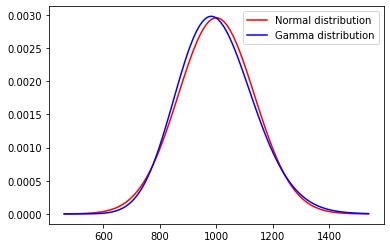

In [191]:
mu = 1000
variance = mu**2/55
sigma = np.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.norm.pdf(x, mu, sigma),alpha=1, color='red', label='Normal distribution')
a=ax.plot(x, gamma.pdf(x, a=nb_Obs, scale=theta), 'b-', label='Gamma distribution')
a=ax.legend()

**On remarque que les formes des 2 lois sont semblable pour la statistique $T_1$**

On propose un test sous le memes hyptheses precedentes avec une region rejetter pour $H_0$:
 $$T_1(X) > K'$$
 où $k'$ peut être calculer:
$$ \mathbb{P}( T_1(X) > k') = \alpha\\ \mathbb{P}(N(0,1) > \frac{k'- \mu}{\sigma}) = \alpha \Rightarrow \boxed{\mathbb{P}( Z \leq k) = 1 - \alpha}
$$


Donc, en posant $q_{1-\alpha}^N$ le quantile de la loi $N(0,1)$, et pour $\alpha = 0.05$, on obtient:

$$\boxed{k = q_{0.95}^{N(0,1)}}$$


In [160]:
kk=stats.norm.ppf(0.95)
k_p=kk*sigma + mu
if g1_lambda <= k_p:
  print("on accepte H0 car",g1_lambda,"<",k_p) 
else:
  print("on rejette H0")
    


on accepte H0 car 726.3363636363636 < 1221.7920178125694


La loi normale pour $\mu = 10^{-3}$ en illustrant la region du rejet

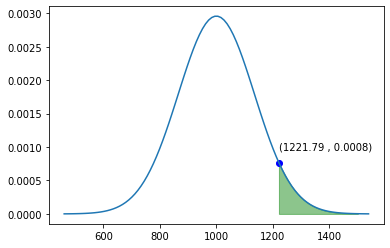

In [161]:
mu = 1000
variance = mu**2/55
sigma = np.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.norm.pdf(x, mu, sigma))



shade = np.linspace(norm.ppf(0.95, mu, sigma), norm.ppf(0.9999,mu, sigma), 20)
ax.fill_between(shade, norm.pdf(shade, mu, sigma), alpha=0.45, color='green',label='region de rejet')

ax.scatter(norm.ppf(0.95, mu, sigma), norm.pdf(norm.ppf(0.95, mu, sigma), mu, sigma) ,color='blue',alpha = 1)
p = "({:.2f} , {:.4f})".format(norm.ppf(0.95, mu, sigma),norm.pdf(norm.ppf(0.95, mu, sigma), mu, sigma))
a=plt.text(norm.ppf(0.95, mu, sigma), norm.pdf(norm.ppf(0.95, mu, sigma), mu, sigma) +0.0002 ,p)